<a href="https://colab.research.google.com/github/chsachin799/100-days-of-ML/blob/main/36_Handling_Missing_Data_Numerical_Data_Simple_Imputeripynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('titanic_toy.csv')

In [ ]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [ ]:
df.isnull().mean() #since the percentage is 5 in fare. we can apply mean/median imputation .

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [ ]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.isnull().mean()

,0
Age,0.196629
Fare,0.050562
Family,0.000000


In [ ]:
mean_age = df['Age'].mean()
median_age = df['Age'].median()

mean_fare = df['Fare'].mean()
median_fare = df['Fare'].median()


In [ ]:
x_train['age_median'] = x_train['Age'].fillna(median_age)
x_train['age_mean'] = x_train['Age'].fillna(mean_age)
x_train['fare_median'] = x_train['Fare'].fillna(median_fare)
x_train['fare_mean'] = x_train['Fare'].fillna(mean_fare)

In [ ]:
x_train.sample(5)

,Age,Fare,Family,age_median,age_mean,fare_median,fare_mean
492,55.0,30.5000,0,55.0,55.000000,30.5000,30.5000
689,15.0,211.3375,1,15.0,15.000000,211.3375,211.3375
484,25.0,91.0792,1,25.0,25.000000,91.0792,91.0792
409,NaN,25.4667,4,28.0,29.699118,25.4667,25.4667
735,28.5,16.1000,0,28.5,28.500000,16.1000,16.1000


In [ ]:
print("Age")
print("Original Variance: ",x_train['Age'].var())
print("Variance after mean: ",x_train['age_mean'].var())
print("Variance after median: ",x_train['age_median'].var())


print("Fare")
print("Original Variance: ",x_train['Fare'].var())
print("Variance after mean: ",x_train['fare_mean'].var())
print("Variance after median: ",x_train['fare_median'].var())

Age
Original Variance:  210.2517072477438
Variance after mean:  168.85827839282692
Variance after median:  169.20731007048096
Fare
Original Variance:  2761.031434948639
Variance after mean:  2621.2351082818022
Variance after median:  2636.918209408447


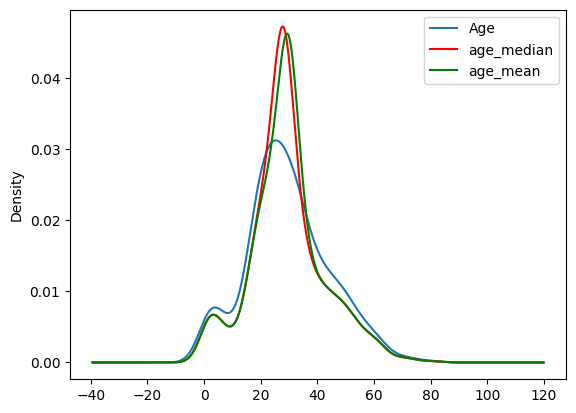

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
x_train['Age'].plot(kind='kde',ax=ax)
x_train['age_median'].plot(kind='kde',ax=ax,color='red')
x_train['age_mean'].plot(kind='kde',ax=ax,color='green')

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

there is a drastic change when mean and median imputation are applied. its a compplete **RED FLAG**.

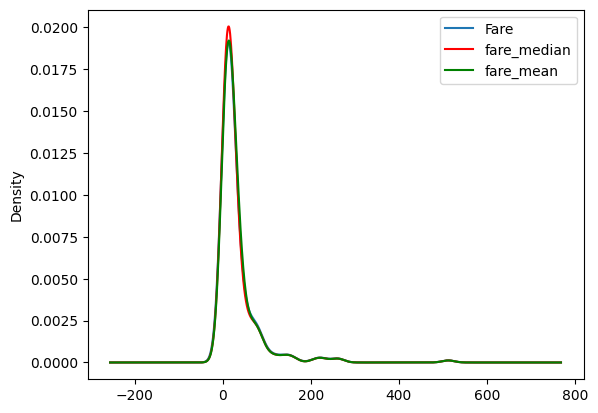

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
x_train['Fare'].plot(kind='kde',ax=ax)
x_train['fare_median'].plot(kind='kde',ax=ax,color='red')
x_train['fare_mean'].plot(kind='kde',ax=ax,color='green')

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

here no drastic changes are seen. therefore its not a red flag.

In [ ]:
x_train.cov()

,Age,Fare,Family,age_median,age_mean,fare_median,fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.085411,71.179136
Fare,75.481375,2761.031435,18.599163,63.938058,59.728479,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.587710,-5.620119,17.671992,17.657625
age_median,210.251707,63.938058,-5.587710,169.207310,168.804449,59.731419,60.687893
age_mean,210.251707,59.728479,-5.620119,168.804449,168.858278,55.824714,56.692642
fare_median,70.085411,2761.031435,17.671992,59.731419,55.824714,2636.918209,2621.439437
fare_mean,71.179136,2761.031435,17.657625,60.687893,56.692642,2621.439437,2621.235108


Using **SKLEARN**


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
imputer1 = SimpleImputer(strategy="median")
imputer2 = SimpleImputer(strategy="mean")

In [ ]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [ ]:
trf.fit(x_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [ ]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [ ]:
trf.named_transformers_['imputer2'].statistics_

array([32.51778772])

In [ ]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [ ]:
x_train

array([[ 45.5       ,  28.5       ,   0.        ],
       [ 23.        ,  13.        ,   0.        ],
       [ 32.        ,   7.925     ,   0.        ],
       ...,
       [ 41.        ,  32.51778772,   2.        ],
       [ 14.        , 120.        ,   3.        ],
       [ 21.        ,  77.2875    ,   1.        ]])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices